<a href="https://colab.research.google.com/github/kadvance/Support-Vector-Machine/blob/main/SVM_for_Classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ LG전자 HS/ES 사업본부 DX Intensive Course - Support Vector Machine ]

SVM을 활용한 Classification

**진행 순서**
1. Dataset 생성
2. Dataset EDA
3. SVM 모델 생성
4. SVM 모델 학습 및 평가
5. SVM 모델 하이퍼파라미터 튜닝 및 평가
6. Baseline 모델 학습 및 평가
7. 성능 비교

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
random_state = 303

# 1. Dataset 생성

In [ ]:
# Create a dataset with 5 columns and 5000 rows
X, y = make_classification(
    n_samples    = 5000, # 샘플 개수
    n_features   = 5, # 전체 변수 개수
    n_informative= 3, # 종속 변수와 상관 관계가 있는 변수의 수
    n_classes    = 2, # 범주 개수
    random_state = random_state,
    flip_y       = 0.01, # class가 임의로 교환되는 샘플의 비율 - 분류를 어렵게 만듦
    weights      = [0.6, 0.4], # 각 class의 샘플 수의 비율
    shuffle      = False
)

# Print the shape of the dataset
print(X.shape)
print(y.shape)


(5000, 5)
(5000,)


In [ ]:
X

array([[ 1.76439058, -0.87691902,  0.4348071 , -1.43220741,  2.07156581],
       [ 0.10540105, -1.38076953,  1.46611958, -0.98813588,  0.70953472],
       [ 1.43055216, -2.18060478,  1.36740805, -1.60605914,  2.54683456],
       ...,
       [-0.57426994, -1.17740286, -1.24688046,  2.0486265 ,  0.99062947],
       [ 1.62746422,  0.26808942, -1.73705641,  0.33982044,  1.80367034],
       [-0.63472465, -1.17707798, -2.13987739,  2.94897584,  1.2777094 ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

print('Trainset: ',X_train.shape)
print('Testset: ',X_test.shape)

Trainset:  (3500, 5)
Testset:  (1500, 5)


# 2. Dataset EDA

In [ ]:
# Convert X_train and y_train to pandas DataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train, columns=["Target"])

In [ ]:
# Print basic statistics of X_train_df
print("X_train statistics:")
X_train_df.describe()

X_train statistics:


,0,1,2,3,4
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,0.596723,-0.010813,0.019237,-0.464436,0.505633
std,1.231781,1.417781,1.349908,1.644443,1.570979
min,-5.639072,-4.978408,-6.655967,-3.363102,-7.464963
25%,-0.008712,-1.105497,-0.978097,-1.576772,-0.439600
50%,0.813186,-0.009842,0.282325,-1.104319,0.596635
75%,1.421772,1.069935,1.069718,0.472957,1.522528
max,3.897519,4.362157,3.954930,5.986046,8.889937


<Axes: xlabel='Target', ylabel='count'>

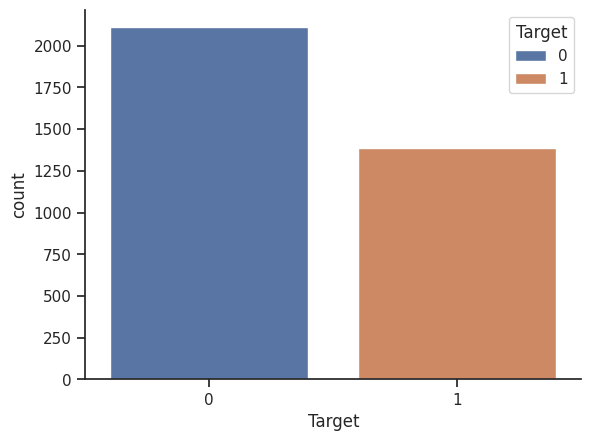

In [ ]:
# Visualize distribution of target variable
sns.countplot(x="Target", hue="Target", data=y_train_df)

<Axes: >

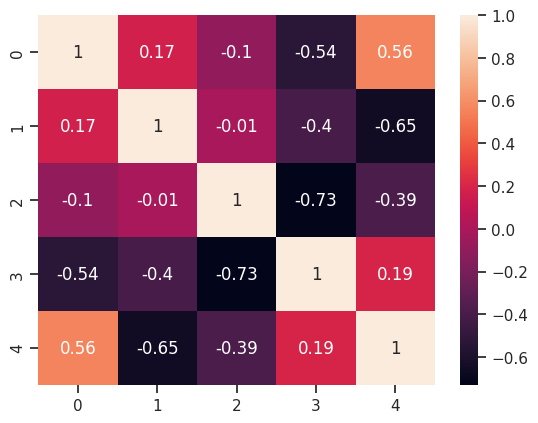

In [ ]:
# Visualize correlation matrix of X_train_df
sns.heatmap(np.round(X_train_df.corr(), 2), annot=True)

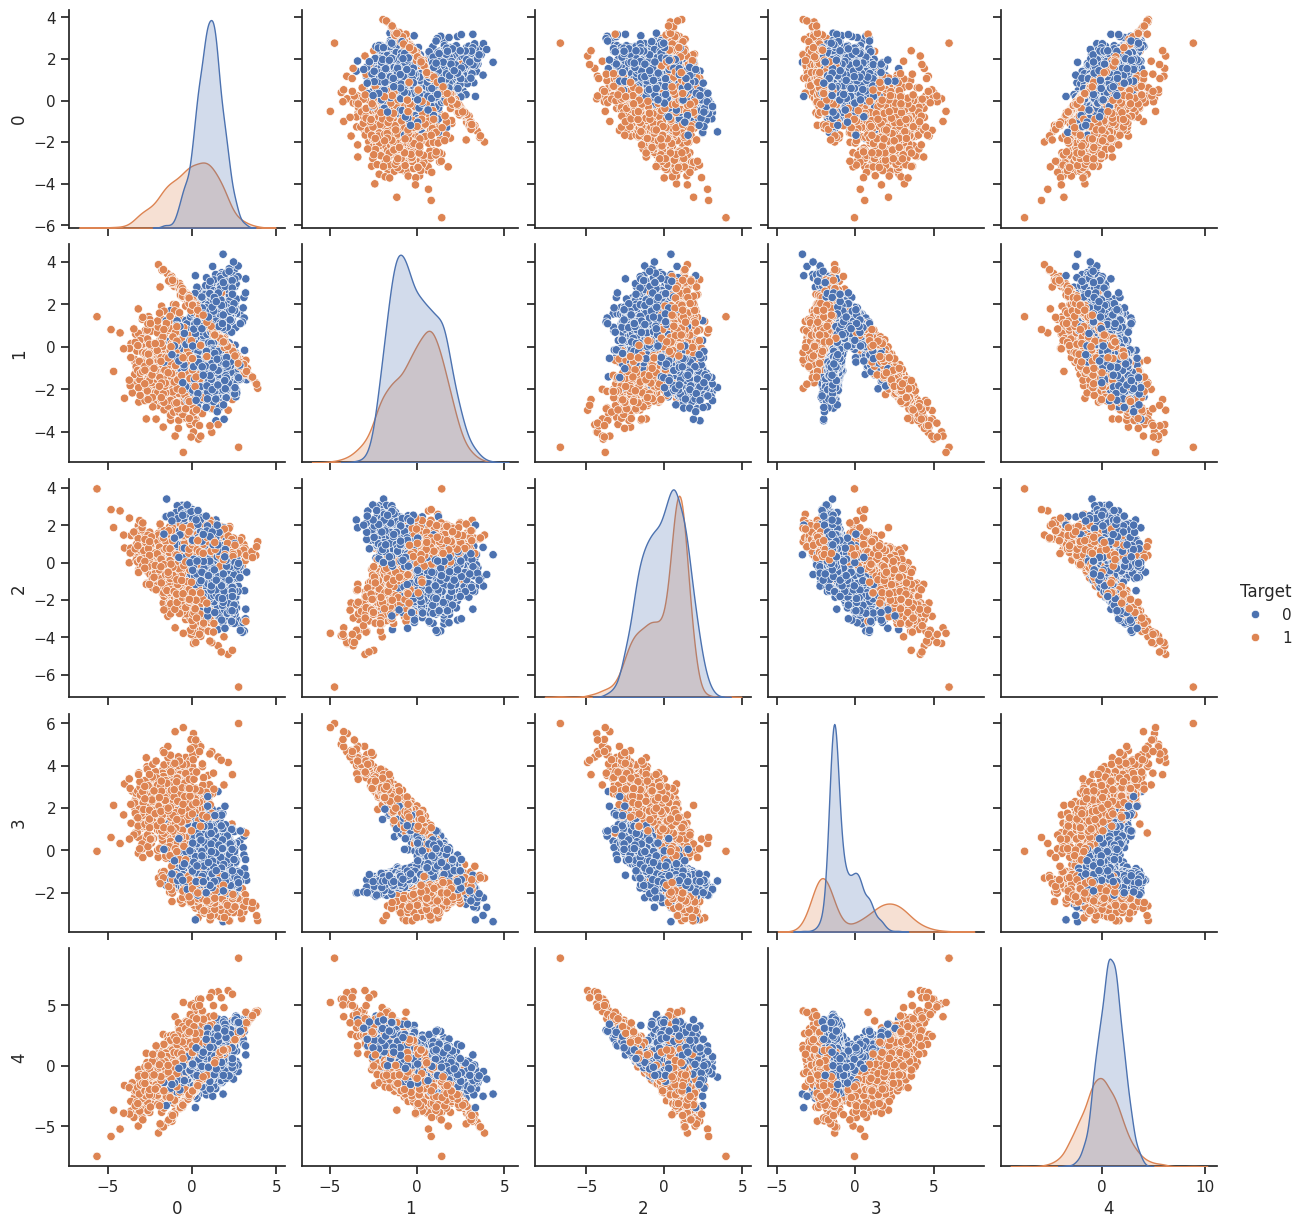

In [ ]:
train_df = pd.concat([X_train_df, y_train_df], axis=1)
sns.pairplot(train_df, hue='Target', diag_kind='kde')
plt.show()

# 3. SVM 모델 생성


*   [SVC 공식문서](https://https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)



In [ ]:
# Create an SVM model for classification
model = SVC()

# 4. SVM 모델 학습 및 평가

In [ ]:
model.fit(X_train, y_train)

SVC()

## 4.1 모델 평가

**사용 평가 지표**
1. F1-Score
2. Recall
3. Precision
4. Accuracy
5. AUROC


<p align="center">
  <img width="800" src="https://images.prismic.io/encord/edfa849b-03fb-43d2-aba5-1f53a8884e6f_image5.png?auto=compress,format">
  <br><strong>Confusioin matrix.</strong></br>
  <br>
</p>

<p align="center">
  <img width="500" src="https://velog.velcdn.com/images/zxxzx1515/post/a1114a22-b77a-4325-a02d-cb41ab079312/image.png">
  <br><strong>AUROC.</strong></br>
  <br>
</p>


In [ ]:
def calc_metrics(y_true: np.ndarray, y_pred: np.ndarray):
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred)

    return {
        "F1 Score"  : round(f1,4),
        "Recall"    : round(recall,4),
        "Precision" : round(precision,4),
        "Accuracy"  : round(accuracy,4),
        "AUROC"     : round(auc_roc,4)
    }

def show_confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

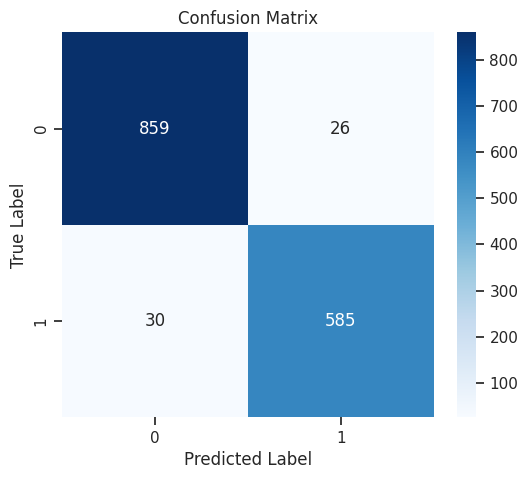

Default SVC: 
F1 Score  : 0.9543
Recall    : 0.9512
Precision : 0.9574
Accuracy  : 0.9627
AUROC     : 0.9609


In [ ]:
# Evaluate the trained SVC model on the test set
y_pred = model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred)

# Calculate and print various evaluation metrics
print('Default SVC: ')
svm_metrics = calc_metrics(y_true=y_test, y_pred=y_pred)
for k, v in svm_metrics.items():
    print(f'{k:10s}: {v:.4f}')

# 5. SVM 모델 하이퍼파라미터 튜닝 및 평가

SVC hyper-parameters: [sklearn's documentation - SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

GridSearchCV: [sklearn's documentation - GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

RandomizedSearchCV: [sklearn's documentation - RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

![search](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbbiSBu%2FbtqF3T0FGSi%2FvnJ5vH9oANNJL2SFdZTrA0%2Fimg.png)

## Cross Validation


<p align="center">
  <img width="500" src="https://scikit-learn.org/stable/_images/grid_search_workflow.png">
  <br><strong>Cross validation workflow in model training.</strong></br>
  <br>
</p>

<p align="center">
  <img width="700" src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png">
  <br><strong>k-fold cross validation.</strong></br>
</p>

In [ ]:
# Define a list of parameters to tune
"""
    "C":, # 정규화 정도
    'kernel':'linear', # 커널의 종류
    'degree': 3, # kernel을 poly(다차식)으로 설정할 경우의 차수
    'gamma': 'auto' # kernel을 rbf,‘poly', 'sigmoid' 로 설정시 kerenel 계수
    'max_iter': -1, # 수렴을 위한 최대 반복 횟수, -1일 경우 무한 반복이며 'tol' 값에 의해 정해짐
    'random_state': random_state
"""

parameters = [
    {
        "kernel" : ["linear"],
        "C"      : [0.1, 1, 10]
    },
    {
        "kernel" : ["poly"],
        "degree" : [2, 3],
        "C"      : [0.1, 1, 10]
    },
    {
        "kernel" : ["rbf"],
        "gamma"  : [0.1, 0.01, 'auto','scale'],
        "C"      : [0.1, 1, 10]
    },
    {
        "kernel" : ["sigmoid"],
        "C"      : [0.1, 1, 10]
    },
]

# Perform grid search with cross-validation: 사전에 설정한 parameter의 범위 내에서 탐색
model = SVC()
grid_search = GridSearchCV(
    estimator  = model,
    param_grid = parameters,
    cv         = 5,
    scoring    = 'accuracy',
    n_jobs     = -1
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'kernel': ['poly']},
                         {'C': [0.1, 1, 10],
                          'gamma': [0.1, 0.01, 'auto', 'scale'],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'kernel': ['sigmoid']}],
             scoring='accuracy')

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.3780129 , 0.73815727, 2.95833764, 0.14853358, 0.28377776,
        0.13350606, 0.32773356, 0.19316239, 0.57894163, 0.15106397,
        0.32535057, 0.1381104 , 0.20161624, 0.09109712, 0.23866282,
        0.13073568, 0.16038327, 0.1507771 , 0.20216227, 0.12730956,
        0.12107301, 0.41428862, 0.35458746, 0.33296742]),
 'std_fit_time': array([0.01858275, 0.04868622, 0.62591312, 0.00321707, 0.01771635,
        0.00346583, 0.02500487, 0.01714163, 0.03184276, 0.0033706 ,
        0.01125753, 0.00323289, 0.03670994, 0.0024105 , 0.047453  ,
        0.02240356, 0.00923281, 0.00760429, 0.02788427, 0.02075526,
        0.02530993, 0.0241748 , 0.01489636, 0.03689822]),
 'mean_score_time': array([0.05470648, 0.04450631, 0.05678225, 0.03283038, 0.05024834,
        0.02501154, 0.04304996, 0.02187872, 0.03772845, 0.060359  ,
        0.12299523, 0.0558413 , 0.07895422, 0.03229308, 0.10580525,
        0.04633017, 0.05660338, 0.04316816, 0.07468739, 0.02931571,
        0.031123

In [ ]:
# Extract the results from the GridSearchCV object
results = grid_search.cv_results_

# Create a DataFrame to store the results
df_results = pd.DataFrame(results)

# Select the relevant columns
df_results = df_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Rename the columns
df_results.columns = ['Hyper-parameters', 'Mean Test Score', 'Standard deviation', 'Rank']

# Print the DataFrame
df_results

,Hyper-parameters,Mean Test Score,Standard deviation,Rank
0,"{'C': 0.1, 'kernel': 'linear'}",0.758571,0.017356,19
1,"{'C': 1, 'kernel': 'linear'}",0.758571,0.017095,19
2,"{'C': 10, 'kernel': 'linear'}",0.758571,0.017095,19
3,"{'C': 0.1, 'degree': 2, 'kernel': 'poly'}",0.904286,0.011815,14
4,"{'C': 0.1, 'degree': 3, 'kernel': 'poly'}",0.792571,0.013803,18
5,"{'C': 1, 'degree': 2, 'kernel': 'poly'}",0.912000,0.011766,12
6,"{'C': 1, 'degree': 3, 'kernel': 'poly'}",0.810000,0.012487,15
7,"{'C': 10, 'degree': 2, 'kernel': 'poly'}",0.911429,0.010341,13
8,"{'C': 10, 'degree': 3, 'kernel': 'poly'}",0.798571,0.011780,17
9,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.955429,0.010037,8


Best GridSearch parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


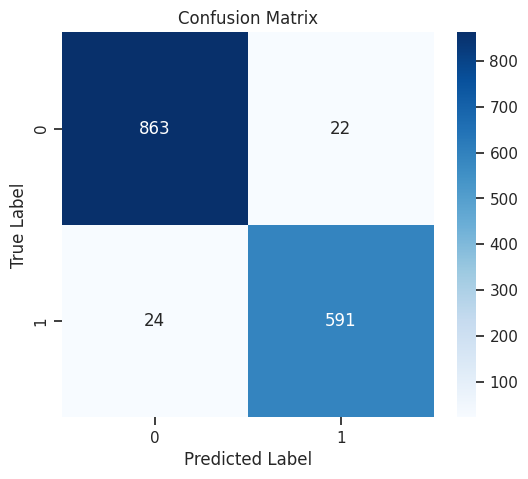

Best SVC: 
F1 Score  : 0.9625
Recall    : 0.9610
Precision : 0.9641
Accuracy  : 0.9693
AUROC     : 0.9681


In [ ]:
# Print the best parameters and score
print("Best GridSearch parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_grid_model = grid_search.best_estimator_
y_pred = best_grid_model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred)

# Calculate and print various evaluation metrics
print('Best SVC: ')
best_grid_svm_metrics = calc_metrics(y_true=y_test, y_pred=y_pred)
for k, v in best_grid_svm_metrics.items():
    print(f'{k:10s}: {v:.4f}')

In [ ]:
distributions = [
    {
        "kernel" : ["linear"],
        "C"      : stats.uniform(loc=0, scale=10)
    },
    {
        "kernel" : ["poly"],
        "degree" : stats.randint(low=0, high=5),
        "C"      : stats.uniform(loc=0, scale=10)
    },
    {
        "kernel" : ["rbf"],
        "gamma"  : stats.uniform(loc=0, scale=0.1),
        "C"      : stats.uniform(loc=0, scale=10)
    },
    {
        "kernel" : ["sigmoid"],
        "C"      : stats.uniform(loc=0, scale=10)
    },
]

# Perform randomized search with cross-validation: 랜덤하게 변수를 선택할 수 있는 상황에서 적용
model = SVC(random_state=42)
random_search = RandomizedSearchCV(
    estimator           = model,
    param_distributions = distributions,
    n_iter              = 10,
    scoring             = 'accuracy',
    random_state        = 42,
    n_jobs              = -1
)
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(random_state=42), n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e7709d39410>,
                                         'kernel': ['linear']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e77070ea710>,
                                         'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e77072c...
                                         'kernel': ['poly']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e7707370110>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e77070ead10>,
                                         'kernel': ['rbf']},
                                        {'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e7707378e50>,
                                         'kernel': ['sigmoid']}],
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.cv_results_

{'mean_fit_time': array([0.12607727, 0.38217335, 0.16663828, 0.09284687, 0.38177433,
        3.14503899, 0.36478863, 0.15559101, 1.47907629, 0.2878139 ]),
 'std_fit_time': array([0.00996746, 0.02571343, 0.01012495, 0.00536421, 0.0145152 ,
        0.46384611, 0.01711542, 0.01069312, 0.14446641, 0.02013721]),
 'mean_score_time': array([0.03604765, 0.07377949, 0.05428042, 0.02471366, 0.07056079,
        0.06108251, 0.07364688, 0.02167826, 0.0494391 , 0.05247078]),
 'std_score_time': array([0.00399071, 0.0011008 , 0.00071495, 0.0009825 , 0.00122928,
        0.01778246, 0.0028176 , 0.00126241, 0.00467032, 0.00810003]),
 'param_C': masked_array(data=[7.965429868602328, 5.986584841970366,
                    4.458327528535912, 8.661761457749352,
                    6.508884729488528, 9.699098521619943,
                    9.385527090157503, 1.8182496720710062,
                    3.0424224295953772, 0.07066305219717406],
              mask=[False, False, False, False, False, False, False, Fal

In [ ]:
# Extract the results from the RandomizedSearchCV object
results = random_search.cv_results_

# Create a DataFrame to store the results
df_results = pd.DataFrame(results)

# Select the relevant columns
df_results = df_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Rename the columns
df_results.columns = ['Hyper-parameters', 'Mean Test Score', 'Standard deviation', 'Rank']

# Print the DataFrame
df_results

,Hyper-parameters,Mean Test Score,Standard deviation,Rank
0,"{'C': 7.965429868602328, 'gamma': 0.0183434789...",0.960286,0.007362,2
1,"{'C': 5.986584841970366, 'kernel': 'sigmoid'}",0.594857,0.011939,8
2,"{'C': 4.458327528535912, 'gamma': 0.0099974915...",0.947143,0.011176,3
3,"{'C': 8.661761457749352, 'gamma': 0.0601115011...",0.969429,0.005159,1
4,"{'C': 6.508884729488528, 'kernel': 'sigmoid'}",0.594857,0.011939,8
5,"{'C': 9.699098521619943, 'kernel': 'linear'}",0.758571,0.017095,5
6,"{'C': 9.385527090157503, 'kernel': 'sigmoid'}",0.594000,0.010969,10
7,"{'C': 1.8182496720710062, 'degree': 4, 'kernel...",0.922286,0.007483,4
8,"{'C': 3.0424224295953772, 'kernel': 'linear'}",0.758571,0.017095,5
9,"{'C': 0.07066305219717406, 'degree': 0, 'kerne...",0.603143,0.000571,7


Best RandomizedSearch parameters: {'C': np.float64(8.661761457749352), 'gamma': np.float64(0.06011150117432088), 'kernel': 'rbf'}


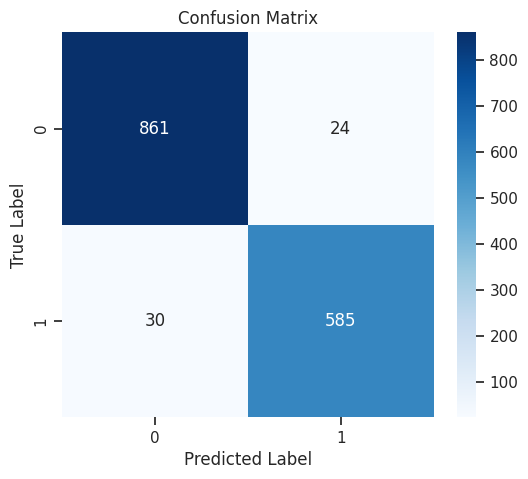

Best SVC: 
F1 Score  : 0.9559
Recall    : 0.9512
Precision : 0.9606
Accuracy  : 0.9640
AUROC     : 0.9621


In [ ]:
# Print the best parameters and score
print("Best RandomizedSearch parameters:", random_search.best_params_)

# Evaluate the best model on the test set
best_random_model = random_search.best_estimator_
y_pred = best_random_model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred)

# Calculate and print various evaluation metrics
print('Best SVC: ')
best_random_svm_metrics = calc_metrics(y_true=y_test, y_pred=y_pred)
for k, v in best_random_svm_metrics.items():
    print(f'{k:10s}: {v:.4f}')

In [ ]:
results = defaultdict(list)

results['Model'] = ['SVM', 'SVM(GridSearch)', 'SVM(RandomizedSearch)']
exp_metrics = [svm_metrics, best_grid_svm_metrics, best_random_svm_metrics]
for metrics in exp_metrics:
    for k, v in metrics.items():
        results[k].append(v)

table = pd.DataFrame(results)
table

,Model,F1 Score,Recall,Precision,Accuracy,AUROC
0,SVM,0.9543,0.9512,0.9574,0.9627,0.9609
1,SVM(GridSearch),0.9625,0.9610,0.9641,0.9693,0.9681
2,SVM(RandomizedSearch),0.9559,0.9512,0.9606,0.9640,0.9621


# 6. Baseline 모델 학습 및 평가

**Baseline models**
1. Logistic Regression
2. Decision Tree

In [ ]:
# Create Logistic Regression and Decision Tree models
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Train Logistic Regression and Decision Tree models on the training set
logreg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

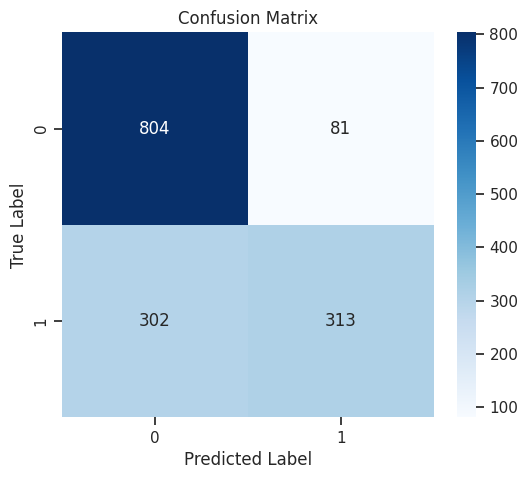

Logistic Regression:
F1 Score  : 0.6204
Recall    : 0.5089
Precision : 0.7944
Accuracy  : 0.7447
AUROC     : 0.7087


In [ ]:
# Evaluate the trained Logistic Regression and Decision Tree models on the test set

# Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred_logreg)

# Calculate and print various evaluation metrics
print('Logistic Regression:')
logreg_metrics = calc_metrics(y_true=y_test, y_pred=y_pred_logreg)
for k, v in logreg_metrics.items():
    print(f'{k:10s}: {v:.4f}')

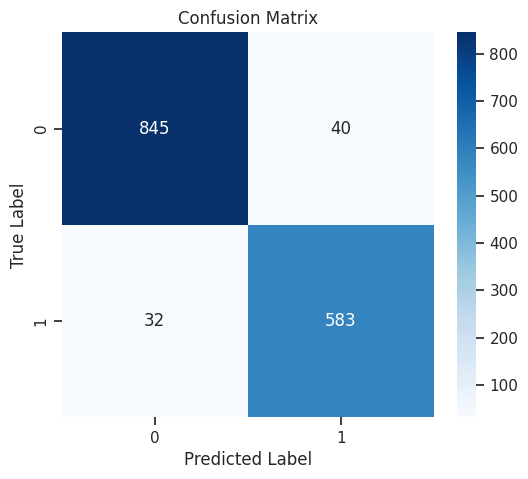

Decision Tree:
F1 Score  : 0.9418
Recall    : 0.9480
Precision : 0.9358
Accuracy  : 0.9520
AUROC     : 0.9514


In [ ]:
# Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Visualize the confusion matrix
show_confusion_matrix(y_true=y_test, y_pred=y_pred_dt)

# Calculate and print various evaluation metrics
print('Decision Tree:')
dt_metrics = calc_metrics(y_true=y_test, y_pred=y_pred_dt)
for k, v in dt_metrics.items():
    print(f'{k:10s}: {v:.4f}')

# 7. 성능 비교

In [ ]:
results = defaultdict(list)

results['Model'] = ['Logistic Regression', 'Decision Tree', 'SVM', 'SVM(tuned)']
exp_metrics = [logreg_metrics, dt_metrics, svm_metrics, best_grid_svm_metrics]
for metrics in exp_metrics:
    for k, v in metrics.items():
        results[k].append(v)

table = pd.DataFrame(results)
table

,Model,F1 Score,Recall,Precision,Accuracy,AUROC
0,Logistic Regression,0.6204,0.5089,0.7944,0.7447,0.7087
1,Decision Tree,0.9418,0.9480,0.9358,0.9520,0.9514
2,SVM,0.9543,0.9512,0.9574,0.9627,0.9609
3,SVM(tuned),0.9625,0.9610,0.9641,0.9693,0.9681


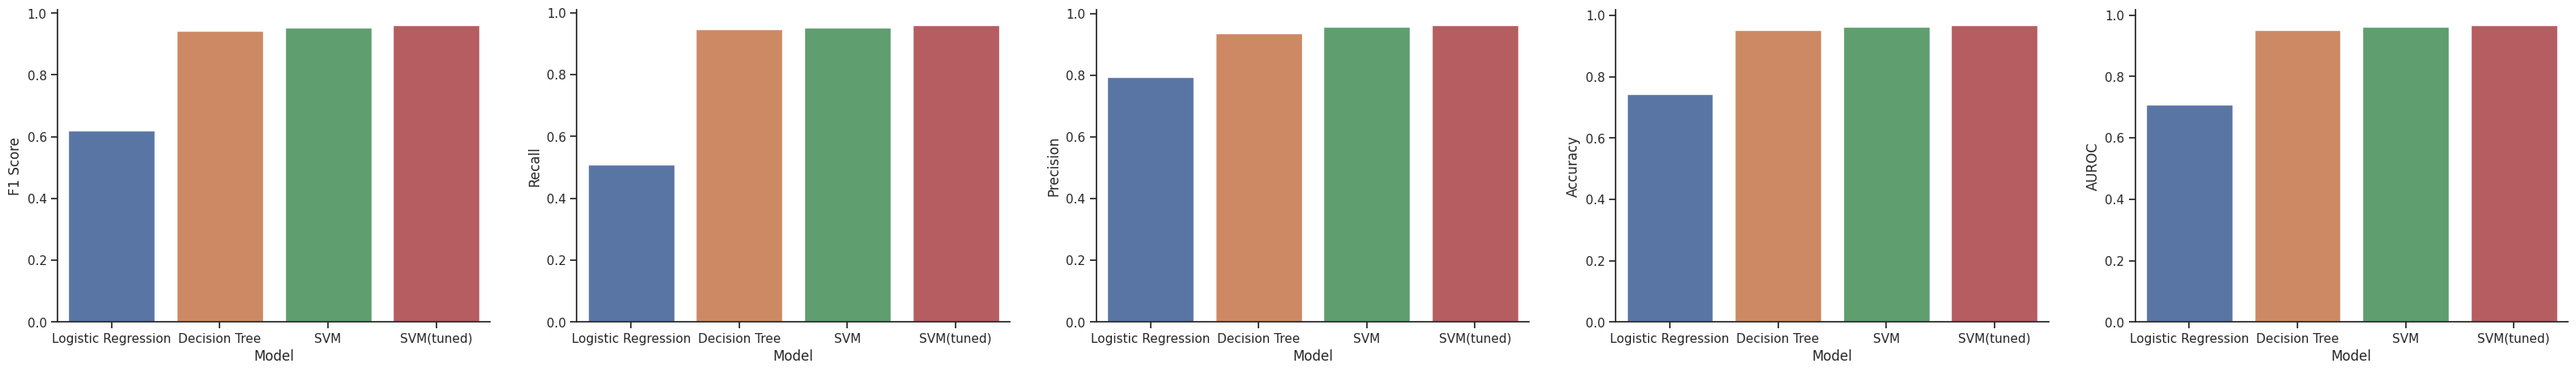

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(40,5))

for i, m in enumerate(['F1 Score', 'Recall', 'Precision', 'Accuracy', 'AUROC']):
    sns.barplot(x="Model", y=m,  hue="Model", data=table, ax=ax[i])